<small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/IASAC-UMH.png width="450" height="200"></small>



# <font color="steelblue">Introducción a Scikit Learn II</font>

**Autoría**: 

Fernando Borrás (f.borras@umh.es), Federico Botella (federico@umh.es),  Inés Hernández (ines.hernandezp@umh.es), Mª Asunción Martínez Mayoral (asun.mayoral@umh.es), Josep Moltó (j.molto@umh.es), Javier Morales (j.morales@umh.es) 

Departamento de Estadística, Matemáticas e Informática. 

Universidad Miguel Hernández de Elche. 


**Financiación**: El material que aparece a continuación se ha desarrollado dentro del marco del proyecto UNIDIGITAL- IASAC.

**Fecha última edición**: 16/11/2022

**Licencia**: <small><a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /></small>




# <font color="steelblue">Introducción</font>


**Descripción:** En este cuaderno proponemos distintas técnicas para el análisis descriptivo numérico y gráfico de datos en problemas de aprendizaje automático. Continuamos describiendo a grosso modo las técnicas habituales de aprendizaje automático y los métodos aplicables de Scikit-Learn en problemas supervisados y no supervisados. Se revisan los métodos para obtener las distintas métricas de calidad de los modelos y se presenta la validación cruzada y el modo de realizarla con Scikit-Learn para reducir sobreajuste.

**Nivel de Formación:** A/B/**C**. Material para estudiantes de grado y postrago que desean introducirse en los procesos de Machine Learning o Aprendizaje Automático.

**Recomendaciones antes de usarlo:** Conocimientos básicos del lenguaje Python, de los módulos `Numpy`, `Pandas`, `Seaborn`. Realización del cuaderno *Primeros-pasos-con-Scikit-Learn I*


## <font color="steelblue">Objetivos de aprendizaje</font>

- Reconocer la necesidad de un análisis exploratorio dirigido a los objetivos del estudio.
- Identificar métodos descriptivos numéricos y gráficos eficaces en función de objetivos y tipos de variables.
- Revisar las técnicas de aprendizaje automático más habituales en aprendizaje supervisado y los métodos de resolución con Scikit-Learn.
- Revisar las técnicas de aprendizaje automático más habituales en aprendizaje no supervisado y los métodos de resolución con Scikit-Learn.
- Conocer las funciones de Scikit-Learn útiles para el cálculo de métricas de calidad en modelos de aprendizaje automático basados en clasificación.
- Conocer las funciones de Scikit-Learn útiles para el cálculo de métricas de calidad en modelos de aprendizaje automático basados en regresión.
- Reflexionar sobre la utilidad de la validación cruzada para minorar sobreajuste.
- Conocer el procedimiento básico de validación cruzada y su implementación con Scikit-Learn.

## <font color="steelblue">Contenidos</font>

1. Preliminares: librerías y datos.
1. Análisis Exploratorio.
1. Técnicas y métodos con Scikit-Learn.
  * Técnicas de aprendizaje supervisado.
  * Técnicas de aprendizaje no supervisado.
1. Selección y evaluación del modelo
  * Métricas.
  * Validación cruzada.


Aunque lo habitual para realizar los análisis exploratorios es dividir el banco de datos en muestra de entrenamiento y  test, por el momento vamos a utilizar la tabla de datos completa para imputar los valores ausentes. En cuadernos posteriores haremos un análisis detallado de preprocesamiento y análisis exploratorio. Los procedimientos aquí presentados se pueden utilizar a la muestra de entrenamiento sin niguna dificultad.

Cargamos los datos y evaluamos la existencia de valores ausentes y procedemos con la imputación.

# <font color="steelblue">Preliminares</font>


## <font color="steelblue">Librerías</font>

Las librerías o módulos que precisamos en este cuaderno son:


In [ ]:
from io import StringIO 
import sys
import numpy as np     
import pandas as pd    
from plotnine import *  
import math            
import random          

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("ticks")

from sklearn.impute import SimpleImputer
import missingno as msno

También podemos utilizar la librería `plotly`, que permite generar gráficos interactivos muy visuales y atractivos, para lo que podríamos utilizar el siguiente código. El manual de la librería `plotly` se puede consultar en este [enlace](https://plotly.com/python/).
```
! pip install plotly
! pip install ipywidgets

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.io as pio
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
import missingno as msno

pio.templates.default = "simple_white"
```


## <font color="steelblue">Bancos de datos</font>

Los bancos de datos que vamos a utilizar en este cuaderno son:

- **`penguins`**, un banco de datos en la librería `Seaborn` que contiene las mediciones de tamaño, observaciones de nidadas y proporciones de isótopos en sangre de 344 pingüinos adultos de Adelia, Barbijo y Papúa, observados en islas del archipiélago Palmer cerca de la estación Palmer en la Antártida. Los datos fueron recogidos y puestos a disposición por la Dra. Kristen Gorman y el Programa de Investigación Ecológica a Largo Plazo (LTER) de la Estación Palmer, Antártida.

-  **`stroke`** y **`winequality`**, que ya fueron descritos en el cuaderno [*'Primeros pasos con Scikit-Learn I'*](https://colab.research.google.com/drive/1aiVZtm6vSPqxNCOmBzfQnfrHGdol-Ykj#scrollTo=-7whhErFzY9J), donde también se dieron las indicaciones básicas para el preprocesado de los datos. El banco de datos `winequality` contiene una variable respuesta cuantitativa y `stroke` una variable respuesta cualitativa. 

Una visión más detallada de lso bancos de datos se pueden encontar en el correspondiente cuadernos sobre los bancos de datos de trabajo.

Procedemos en este apartado con la lectura de los datos y un preprocesado básico de estos dos últimos, para ajustar los tipos de las variables o características e imputar valores perdidos.


In [ ]:
## CARGA DE DATOS
##----------------
# Cargamos los datos 'penguins' disponibles en la libreria seaborn
penguins = sns.load_dataset("penguins")
##----------------
# Stroke Prediction Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/stroke_ori.csv'
stroke = pd.read_csv(url)
##----------------
# Winequality-red
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/winequality-red.csv'
winequality = pd.read_csv(url)

In [ ]:
# Cargamos los módulos de identificación e imputación de valores perdidos
from sklearn.impute import SimpleImputer
import missingno as msno

Para empezar, identificamos el tipo de variable asignado a las características de la tabla.

In [ ]:
print(stroke.dtypes)
print('\n')
print(winequality.dtypes)

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


Apreciamos que todas las variables en `winequality` tienen asignado un tipo `float` o `int`, por lo que no será necesario reajustar tipos, pero en `stroke` hay variables con tipo `object` que ha de modificarse. Para proceder con una modificación del tipo coherente, visualizamos los datos de tipo `object`.

In [ ]:
print(stroke.select_dtypes(include=['object']).head)

<bound method NDFrame.head of       gender hypertension heart_disease ever_married      work_type  \
0       Male           No           Yes          Yes        Private   
1     Female           No            No          Yes  Self-employed   
2       Male           No           Yes          Yes        Private   
3     Female           No            No          Yes        Private   
4     Female          Yes            No          Yes  Self-employed   
...      ...          ...           ...          ...            ...   
5105  Female          Yes            No          Yes        Private   
5106  Female           No            No          Yes  Self-employed   
5107  Female           No            No          Yes  Self-employed   
5108    Male           No            No          Yes        Private   
5109  Female           No            No          Yes       Govt_job   

     Residence_type   smoking_status stroke  
0             Urban  formerly smoked    Yes  
1             Rural     n

Resulta pues que todas estas variables identificadas originariamente con tipo `object`, son categóricas. Cambiamos pues su tipo a `category`.  También la variable `quality`, con tipo `int64`, la convertimos a categórica.

In [ ]:
# Especificación de tipo 'category' en las variables categóricas de 'stroke'

# Seleccionamos los nombres de la columnas que corresponden con el tipo object 
cat_names = stroke.select_dtypes(include=['object']).columns.values
# Convertimos dichas variables a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")

# Seleccionamos los nombres de la columnas que corresponden con el tipo int64 que son cualitativas 
cat_names = stroke.select_dtypes(include=['int64']).columns.values
# Convertimos dichas variables a tipo category
stroke[cat_names] = stroke[cat_names].astype("category")

# Comprobamos el resultado por pantalla 
stroke.dtypes

id                   category
gender               category
age                   float64
hypertension         category
heart_disease        category
ever_married         category
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke               category
dtype: object

Inspeccionamos a continuación si cualquiera de las dos tablas de datos contienen valores faltantes. Lo hacemos con la función `isnull()` y contabilizando el número de valores perdidos por columnas (con la función `sum()`).

In [ ]:
print(stroke.isnull().sum())
print('\n')
print(winequality.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Observamos pues, que `winequality` no tiene valores ausentes, pero sí la tabla  de datos `stroke` en la variable `bmi`. Procedemos pues, con un proceso de imputación para rellenar los datos faltantes, y optamos por imputar con la mediana de los datos.  

In [ ]:
# Configuramos el entorno de imputación con la mediana
imp = SimpleImputer(missing_values=np.nan, strategy='median')
# Imputamos sobre la variable original los valores nuevos
stroke[['bmi']] = imp.fit_transform(stroke[['bmi']])
# y comprobamos que ahora ya no hay faltantes
stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Si queremos ejecutar conjuntamente toda la sintaxis precisa para el preprocesado de los datos, lanzamos el código a continuación


In [ ]:
from sklearn.impute import SimpleImputer

# Stroke Prediction Dataset 
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/stroke_ori.csv'
stroke = pd.read_csv(url)
cat_names = stroke.select_dtypes(include=['object']).columns.values
stroke[cat_names] = stroke[cat_names].astype("category")
cat_names = stroke.select_dtypes(include=['int64']).columns.values
stroke[cat_names] = stroke[cat_names].astype("category")
imp = SimpleImputer(missing_values=np.nan, strategy='median')
stroke[['bmi']] = imp.fit_transform(stroke[['bmi']])

# Winequality-red
url = 'https://raw.githubusercontent.com/ia4legos/MachineLearning/main/data/winequality-red.csv'
winequality = pd.read_csv(url)

# <font color="steelblue">Análisis Exploratorio</font>

El análisis descriptivo o exploratorio preliminar es siempre fundamental al iniciar un análisis estadístico, de modo especial para la muestra de entrenamiento, que es con la que se ajusta el modelo. No hay que perder de vista que las muestras de entrenamiento para ajustar y test para evaluar el modelo, deben ser similares en cuanto a características, por lo que cobra sentido describir el banco de datos completo, que es con lo que procedemos a continuación. El análisis exploratorio lo dividimos en **análisis numérico** y **análisis gráfico**.

Realizamos aquí un breve compendio de procedimientos de análisis exploratorio, y en concreto en los que resultan útiles para investigar relaciones entre una variable respuesta y varias características, tanto si la respuesta es numérica como categórica. Técnicas y gráficos más sofisticados para el análisis exploratorio según los objetivos irán surgiendo en sucesivos cuadernos en los que se estudian técnicas específicas.  

Cuando tenemos una variable respuesta numérica el objetivo esencial del análisis será la predicción a través de técnicas de regresión, y cuando esta es categórica, el objetivo será la clasificación, siempre en función del resto de variables en el banco de datos. También el tipo de los predictores orienta la elección de técnicas a utilizar para el análisis exploratorio. 

Repasamos a continuación las posibles casuísticas.


## <font color="steelblue">Respuesta y predictoras numéricas</font>

### <font color="steelblue">Análisis numérico</font>

Consideremos la base de datos `winequality`, con todas sus variables de tipo numérico. La **descripción numérica** habitual de variables numéricas o cuantitativas es a través de **medidas de localización y dispersión**. 

Aunque hay muchas librerías para calcular este tipo de estadísticas, proponemos utilizar la función [`describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) de `Pandas` que nos permite obtener el número de casos, media, desviación típica, mínimo, percentiles 25, 50 (mediana), y 75, así como el máximo de cada una de las variables cuantitativas del banco de datos.

```
# Descriptiva de variables numéricas
datos.describe()
```

In [ ]:
# Descripción numérica, que trasponemos para leer mejor
round(winequality.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00


Para estudiar la relación de cada característica con la respuesta (`quality`) procedemos con una **análisis de correlación**, con la función `corr()`. 

In [ ]:
round(winequality.corr(),4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.0000,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatile acidity,-0.2561,1.0000,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citric acid,0.6717,-0.5525,1.0000,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,1.0000,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,1.0000,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,1.0000,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,1.0000,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,1.0000,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,1.0000,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,1.0000,0.0936,0.2514


Puesto que las correlaciones nos interesan en tanto y cuanto aportan información sobre la relación del resto de variables y la respuesta, sólo nos interesa de momento la última fila de la tabla, que confronta `quality` frente a todas las demás variables. Las variables que tienen una mayor correlación positiva o directa con `quality` son `alcohol` (correlación=0.4762) y `citric acid` (0.2264). Por el contrario, las que tienen una mayor correlación negativa o inversa son `volatile acidity` (-0.3906) y `total sulfur dioxide` (-0.1851).

### <font color="steelblue">Análisis gráfico</font>

El análisis gráfico habitual para describir una respuesta cuantitativa se centra en los **histogramas, gráficos de densidad** (también llamados **gráficos kernel**) y **gráficos de cajas**, que visualizan su distribución, esto es, cómo se reparte.

Si bien la variable objetivo en `winequality` es la variable numérica `quality`, cabe resaltar que esta es entera, por lo que al construir el histograma, especificaremos que la variable toma valores discretos para que proyecte una barra en cada valor posible.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


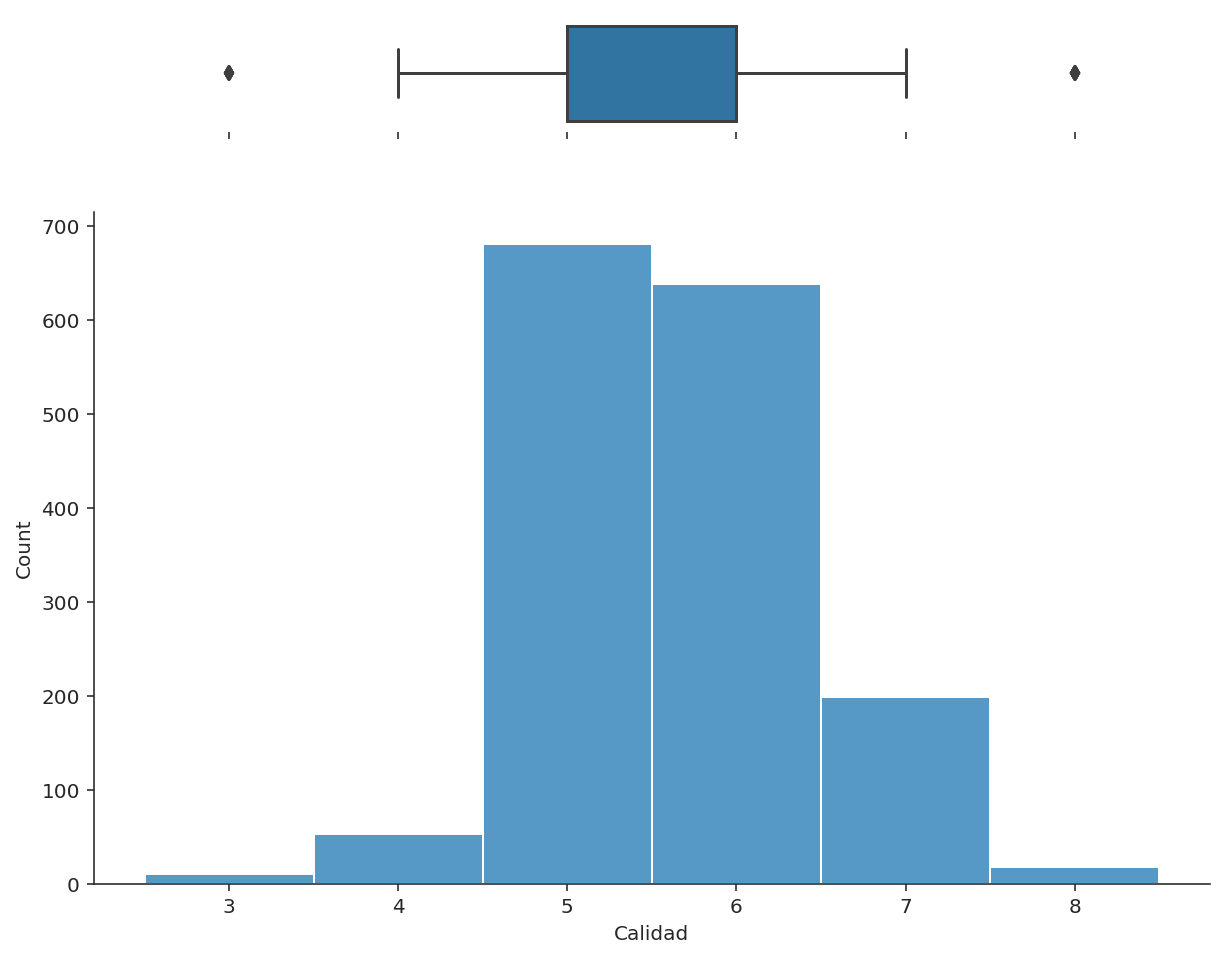

In [ ]:
# Con la librería Seaborn
# Creamos una figura conjunta con un gráfico de cajas (ax_box) y un histograma (ax_hist)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 8))  
# Gráfico de cajas
sns.boxplot(winequality["quality"], ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
# histograma con valores discretos
sns.histplot(winequality, x="quality", discrete = True, ax=ax[1])
sns.despine(right=True, top=True, ax = ax[1])
 
# Eliminamos el nombre del eje x para el boxplot
ax[0].set(xlabel='', yticks =[])
# y nombramos el eje X en el histograma
ax[1].set(xlabel='Calidad')
plt.show()

La distribución es simétrica según se aprecia en ambos gráficos, cajas e histograma, y los valores más frecuentes se aprecian en el histograma, en el 5 y el 6.

Cuando la variable que queramos describir no sea de tipo entera sino decimal, para construir el histograma habremos de prescindir del argumento `discrete = True`. Lo mostramos a continuación para describir por ejemplo la variable `alcohol`.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


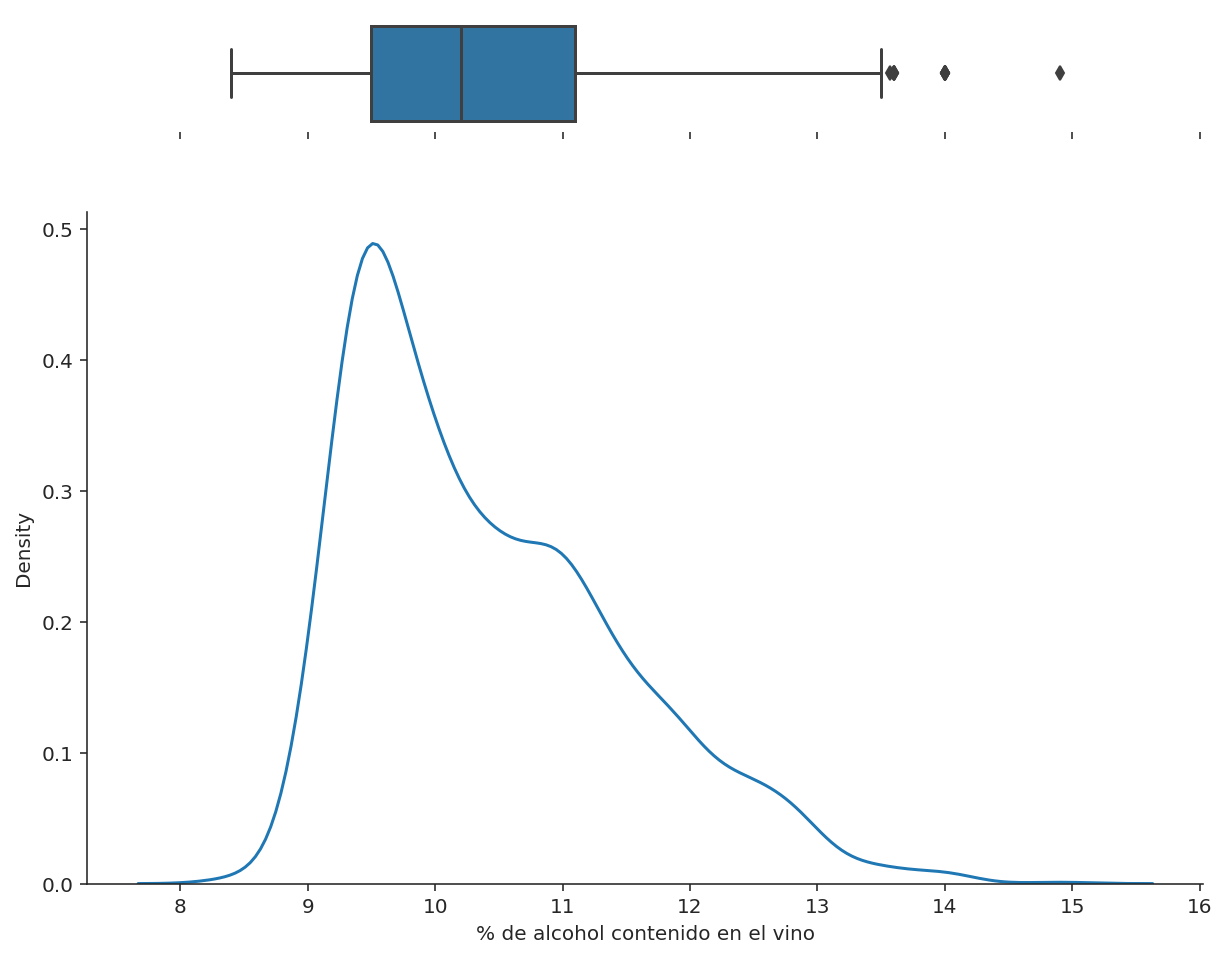

In [ ]:
# Creamos una figura conjunta con un gráfico de cajas (ax_box) y un kernel (ax_ker)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 8)) 
# Gráfico de cajas
sns.boxplot(winequality["alcohol"], ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
# Histograma
# sns.histplot(data=winequality, x="alcohol", ax=ax[1])
# Gráfico de densidad/kernel
sns.kdeplot(data=winequality, x="alcohol", ax=ax[1])
sns.despine(right=True, top=True, ax = ax[1])
 
# Eliminamos el nombre del eje x para el boxplot
ax[0].set(xlabel='', yticks =[])
# y nombramos el eje X en el histograma/kernel
ax[1].set(xlabel='% de alcohol contenido en el vino')
plt.show()

En este caso la distribución no es simétrica, como bien se aprecia en ambos gráficos; en concreto en la caja el bigote de la derecha es más largo que el de la izquierda, y en el histograma/gráfico de densidad, la cola de la derecha es más prolongada que la de la izquierda, que tiene una pendiente relevante. Podemos decir que los valores más frecuentes se encuentran en el rango de 9% a 11% de alcohol.

Para describir gráficamente las relaciones entre variables cuantitativas tenemos dos opciones principales:

* **Gráfico de intensidad de las correlaciones**, que permite visualizar de forma muy rápida las correlaciones.
* **Gráfico múltiple de dispersión**, que muestra mediante gráficos de dispersión dos a dos, el tipo de relación o tendencia entre las variables disponibles, y en particular entre la respuesta y el resto. 

Veamos cómo generar estos gráficos. Empezamos por el de correlaciones.

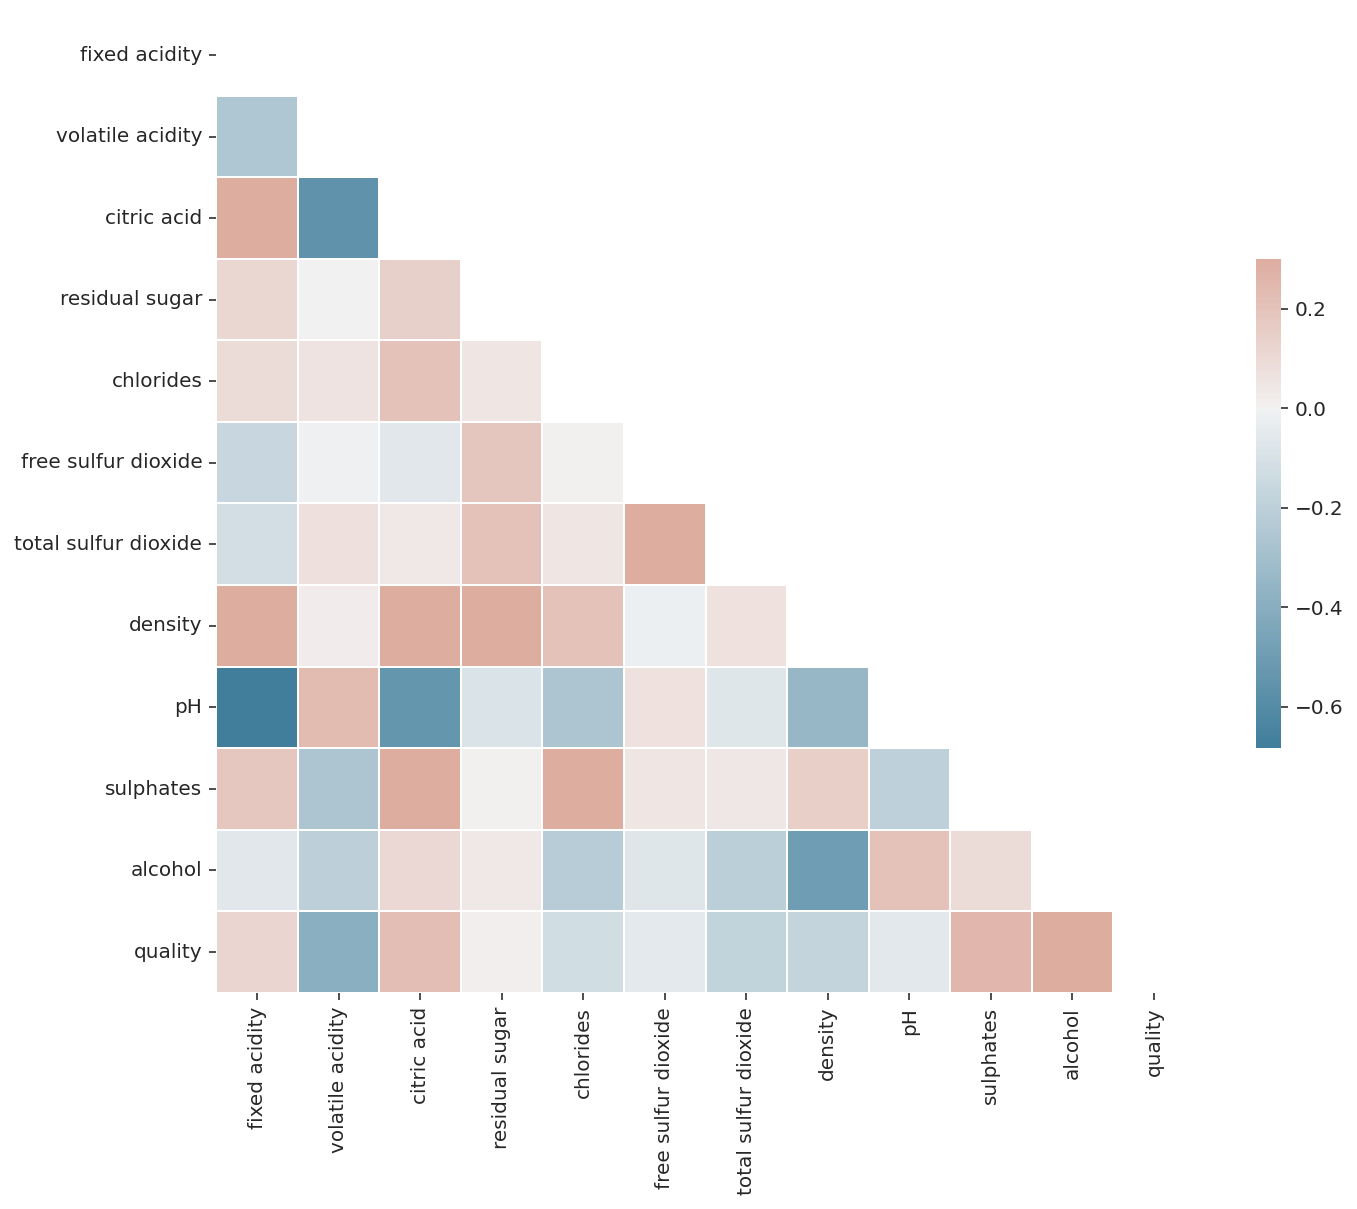

In [ ]:
# GRÁFICO DE INTENSIDAD DE LAS CORRELACIONES
# Obtenemos la matriz de correlación
corr = winequality.corr()
# Generamos un artificio para hacer ceros por encima de la diagonal
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configuración del gráfico
f, ax = plt.subplots(figsize=(11, 9))
# Paleta de colores
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# gráfico de intensidad
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Como ya hicimos antes en el análisis numérico con la matriz de correlaciones, en este gráfico solo nos interesa la última fila con las correlaciones de `quality` con el resto de variables. En colores más intensos se identifican las correlaciones más relevantes, ya sean en positivo (rojos) o en negativo (azules).

Para construir el gráfico de dispersión múltiple, con todos los gráficos de dispersión para todos los pares de variables, utilizaríamos la sintaxis:
```
g = sns.PairGrid(winequality)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
```
Pero puesto que sólo nos interesa la relación con la respuesta, pintamos sólo estos.


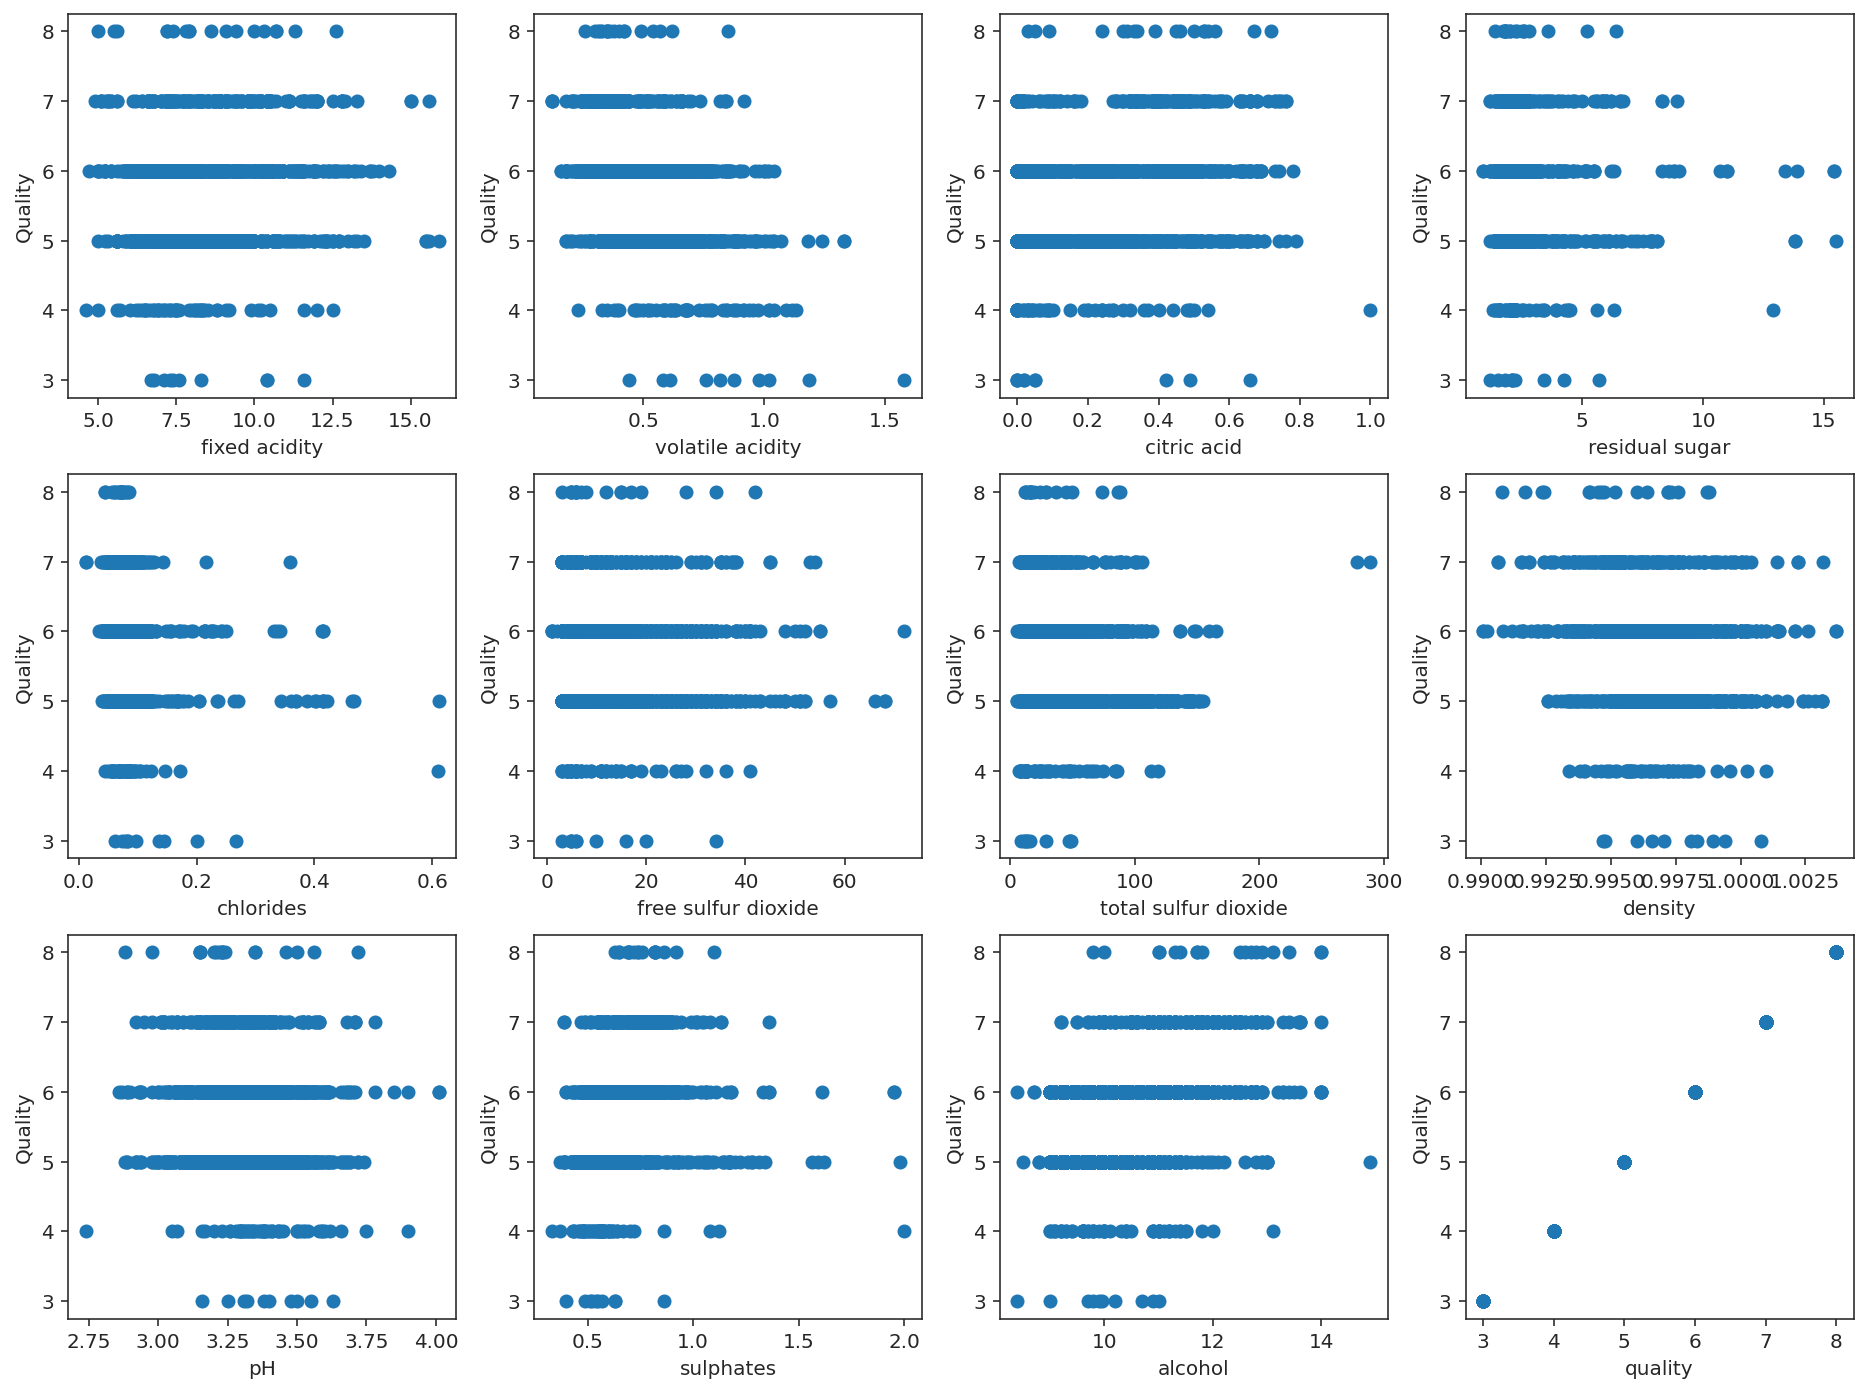

In [ ]:
# Seleccionamos todas las variables
variables=list(winequality.columns.values)
# Creamos los 12 gráficos de dispersión contra la variable 'quality'
f, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 12))  
j=0
for i in range(3):
  for p in range(4):
    ax[i,p].scatter(x=variables[j], y='quality', data = winequality)
    ax[i,p].set(ylabel='Quality')
    ax[i,p].set(xlabel=variables[j])
    j+=1  
plt.show()

A la vista de estos gráficos no se aprecia tendencia alguna para describir la relación de las variables predictoras con la respuesta.

## <font color="steelblue">Respuesta numérica y predictoras categóricas</font>

En estas casuística, los gráficos pertinentes para describir la respuesta numérica ya han sido descritos en el apartado anterior. Nos centramos pues exclusivamente en cómo describir las asociaciones entre una respuesta cuantitativa y un predictor categórico.

Utilizamos aquí el banco de datos `penguins` de `Seaborn`.

Uno de los objetivos a investigar con este banco de datos es descubrir si la longitud del ala (`flipper_length_mm`) es diferente para las diferentes especies consideradas (`species`). Tenemos pues una variable respuesta u objetivo de tipo numérico (longitud del ala) y un predictor cualitativo (especie).  Hacemos un preprocesado básico eliminando los valores faltantes. 

In [ ]:
# Cargamos los datos que están disponibles en la libreria seaborn
penguins = sns.load_dataset("penguins")
print(penguins[['flipper_length_mm','species']].isnull().sum())
# quitamos faltantes y asignamos a la tabla 'penguins2'
penguins2=penguins[['flipper_length_mm','species']].dropna()

flipper_length_mm    2
species              0
dtype: int64


In [ ]:
# Inspeccionamos las primeras muestras
penguins2.head()

,flipper_length_mm,species
0,181.0,Adelie
1,186.0,Adelie
2,195.0,Adelie
4,193.0,Adelie
5,190.0,Adelie


### <font color="steelblue">Análisis numérico</font>

Para describir numéricamente la relación entre la longitud del ala y la especie, procedemos a calcular las medidas de localización y dispersión en cada uno de los niveles o categorías de la predictora. 

Utilizamos las tablas pivotales para obtener dichos  descriptivos.

In [ ]:
# Tabla descriptiva
tabla = pd.pivot_table(penguins2, 
               values = ['flipper_length_mm'], 
               index = ['species'],
               aggfunc = {'describe'})
tabla.T

species                               Adelie   Chinstrap      Gentoo
flipper_length_mm describe 25%    186.000000  191.000000  212.000000
                           50%    190.000000  196.000000  216.000000
                           75%    195.000000  201.000000  221.000000
                           count  151.000000   68.000000  123.000000
                           max    210.000000  212.000000  231.000000
                           mean   189.953642  195.823529  217.186992
                           min    172.000000  178.000000  203.000000
                           std      6.539457    7.131894    6.484976

Observamos pues que en términos de medias, los pingüinos de la especie `Gentoo` tienen las alas más largas que los `Chinstrap`, y estos a su vez más largas que los `Adelie`.  En términos de máximos, los `Chinstrap` y los `Adelie` llegan a valores muy similares, y observando las desviaciones estándar, los `Chinstrap` tienen algo más de dispersión que las otras dos especies, con desviaciones estándar muy similares entre sí.

### <font color="steelblue">Análisis gráfico</font>

Las opciones gráficas para representar la relación entre respuesta y característica predictora pasan por visualizar la distribución de la respuesta en cada una de las categorías del predictor, con:

- diagramas de cajas comparativos
- histogramas comparativos.

Veamos cómo construirlos. Empezamos por el gráfico de cajas.

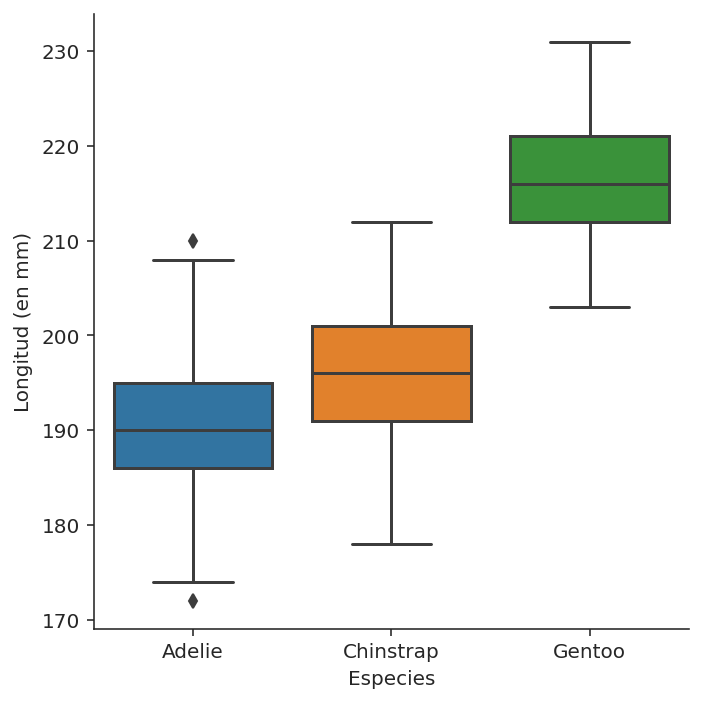

In [ ]:
# Gráfico boxplot comparativo
ax = sns.catplot(y="flipper_length_mm", x="species", kind="box", data=penguins2)
ax.set(ylabel='Longitud (en mm)', xlabel='Especies');

En este gráfico se visualiza claramente la similitud de la dispersión de los datos en las tres especies, así como la diferencia entre los valores medianos para cada especie. En las tres especies los sujetos se distribuyen de forma simétrica en torno a la mediana, lo que deriva en la coincidencia de media, mediana y moda en cada categoría. 

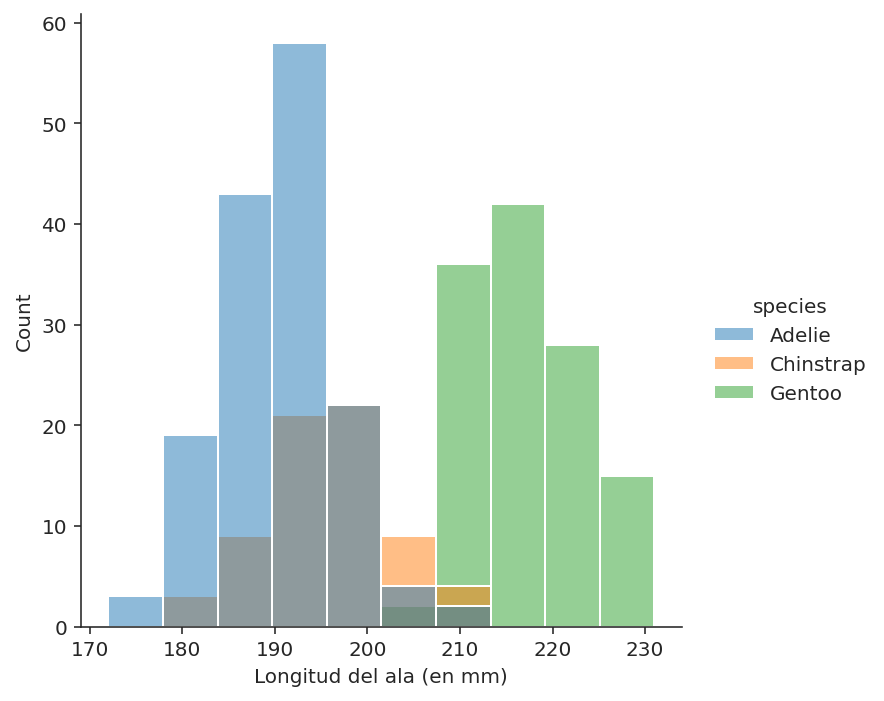

In [ ]:
# Histograma comparativo
ax = sns.displot(penguins2, x="flipper_length_mm", hue="species")
ax.set(xlabel = 'Longitud del ala (en mm)');

Al superponer los tres histogramas, se visualiza claramente que las tres especies definen tres poblaciones claramente distintas entre sí, y en especial la `Gentoo` respecto de las otras dos. 

## <font color="steelblue">Respuesta categórica y predictoras numéricas</font>

Las descripciones numéricas y gráficas en este caso son similares a las soluciones propuestas en el apartado anterior, intercambiando variables objetivo y predictora, así como los ejes en los gráficos.


Para ejemplificar esta casuística utilizamos la tabla de datos `stroke`, con variable respuesta `stroke`, que indica si ha habido paro cardiaco o no, y nos concentramos exclusivamente en la predictora `bmi`. 
El objetivo es investigar si la característica `bmi` se comporta de modo diferente en los dos niveles de respuesta a ictus (*Yes/No*).


### <font color="steelblue">Análisis numérico</font>

Para mostrar un análisis numérico de una respuesta categórica, lo apropiado es utilizar las tablas de frecuencias, absolutas o relativas, que podemos obtener fácilmente con las tablas pivotales.

In [ ]:
# Tabla descriptiva
tabla = pd.pivot_table(stroke, 
               values = ['id'], 
               index = ['stroke'],
               aggfunc = {'id':'count'})
# frecuencias absolutas
print(tabla.T)
# frecuencias relativas (en %)
print(tabla.T/len(stroke)*100)

stroke    No  Yes
id      4861  249
stroke         No       Yes
id      95.127202  4.872798


Resulta que solo un 4.87% de los sujetos en el estudio sufrieron un ictus (*stroke*).

Para investigar de forma numérica la relación `bmi ~ stroke`, describimos la variable numérica `bmi` en los dos niveles de respuesta a `stroke`. Como ya hicimos antes, la forma más sencilla de hacerlo es mediante las tablas pivotales.

In [ ]:
# Tabla descriptiva
tabla = pd.pivot_table(stroke, 
               values = ['bmi'], 
               index = ['stroke'],
               aggfunc = {'describe'})
tabla.T

stroke                       No         Yes
bmi describe 25%      23.400000   26.400000
             50%      28.000000   29.700000
             75%      33.100000   33.700000
             count  4700.000000  209.000000
             max      97.600000   56.600000
             mean     28.823064   30.471292
             min      10.300000   16.900000
             std       7.908287    6.329452

Observamos en esta tabla que los que han padecido `stroke` tienen un valor medio de `bmi` mayor a los que no lo han sufrido, y estos últimos presentan una mayor variabilidad entre las observaciones.

### <font color="steelblue">Análisis gráfico</font>

Para representar gráficamente las frecuencias de aparición de las categorías en la variable respuesta categórica, utilizamos la librería `Seaborn` y la función `countplot()`. 

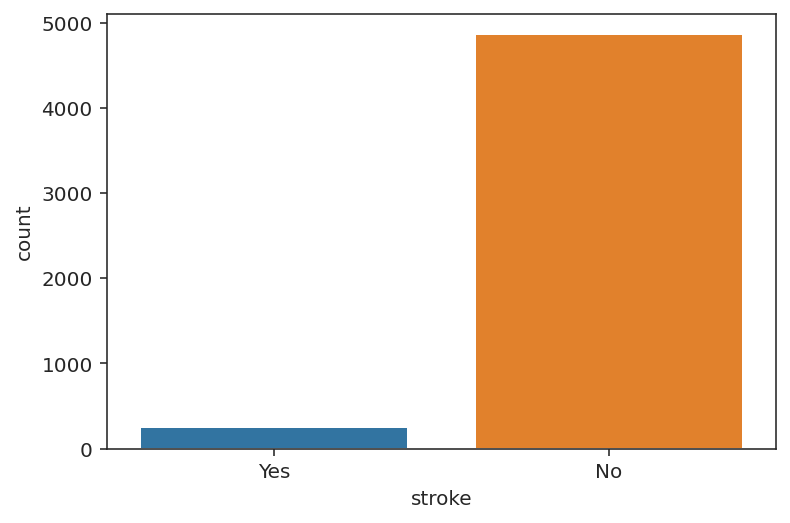

In [ ]:
ax=sns.countplot(x="stroke", data=stroke)

Para investigar gráficamente la relación entre `stroke` y `bmi`, procedemos igual que en el apartado anterior, intercambiando variable respuesta-predictora, y representamos en gráficos de cajas la distribución de los valores de `bmi` para las categorías de respuesta en `stroke`.

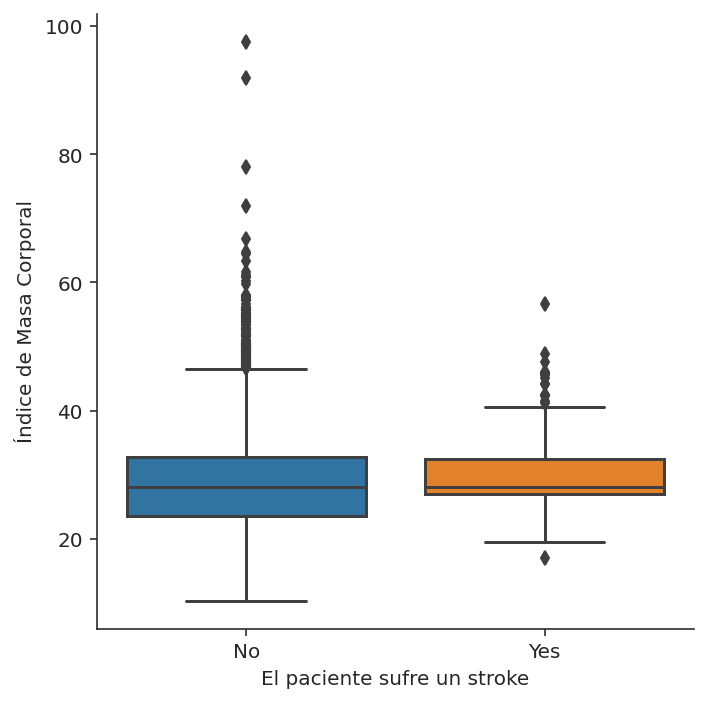

In [ ]:
# Gráfico boxplot comparativo
ax = sns.catplot(y="bmi", x="stroke", kind="box", data=stroke)
ax.set(xlabel = 'El paciente sufre un stroke', ylabel='Índice de Masa Corporal');

Observamos en el gráfico como los dos grupos no difieren sustancialmente respecto a sus valores medianos de `bmi`, pero sí respecto a variabilidad: el grupo de los que no han padecido `stroke` tiene valores de `bmi` mucho más dispersos (y su distribución es también más asimétrica a la derecha) que el grupo `stroke=Yes`. 

También podemos comparar las distribuciones de ambos grupos de respuesta con histogramas, o mejor con gráficos de densidad.

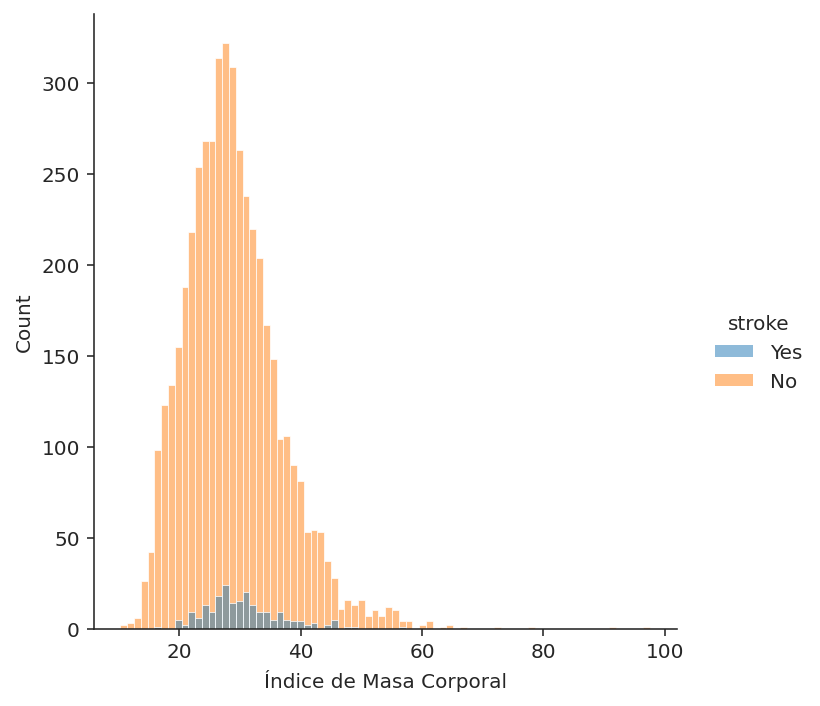

In [ ]:
# Histograma comparativo
ax = sns.displot(stroke, x="bmi", hue="stroke")
ax.set(xlabel = 'Índice de Masa Corporal');

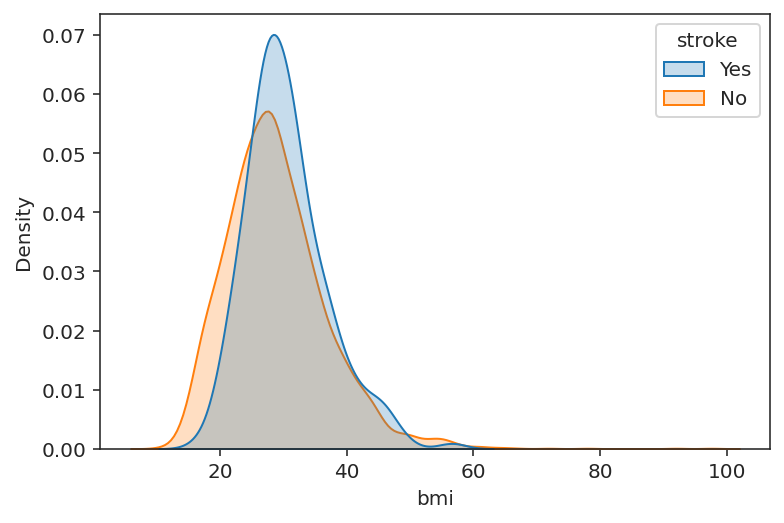

In [ ]:
# Gráficos de densidad comparativos
ax=sns.kdeplot(data=stroke,x='bmi',hue='stroke',
               fill=True,common_norm=False)

El histograma comparativo, al estar graficado sobre conteos, permite apreciar el solapamiento de las dos distribuciones de `bmi` en los grupos`stroke=Yes` y `stroke=No`, pero el hecho de que estos dos grupos tengan tamaños tan dispares, genera visualmente más diferencias entre las distribuciones que las que realmente se aprecian cuando pasamos a la escala relativa con el gráfico de densidad. En este segundo gráfico se aprecia, en escala de densidad, la similaridad de la distribución de `bmi` en los dos grupos de `stroke`. 


Podemos combinar los gráficos anteriores en un único gráfico que nos proporciona la misma información.

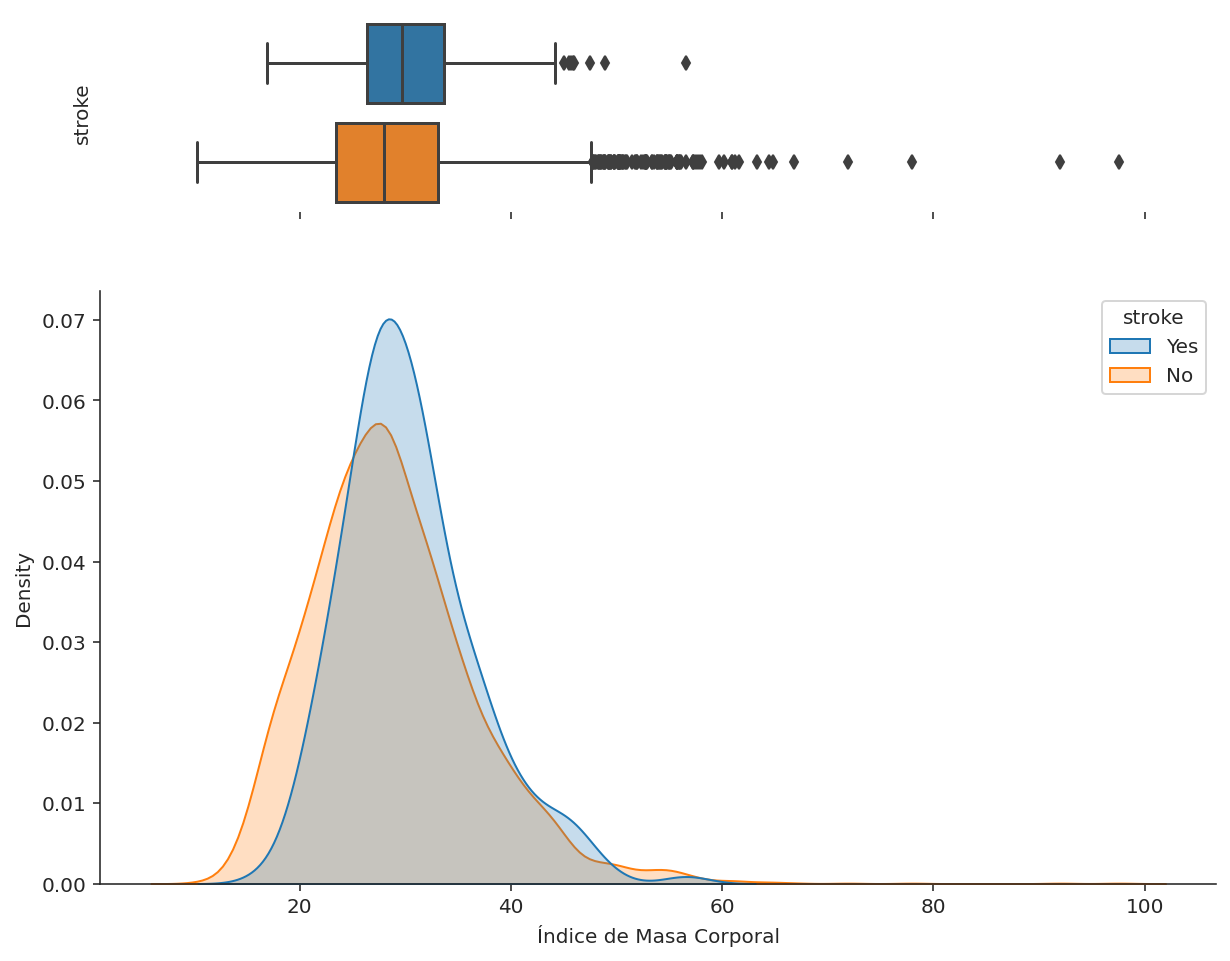

In [ ]:
# Creamos una figura conjunta con un gráfico de cajas y un histograma (ax_box and ax_hist)
f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.25, .75)}, figsize=(10, 8))  
# assigning a graph to each ax
sns.boxplot(x = "bmi", y = "stroke" , data = stroke, ax=ax[0])
sns.despine(left=True, bottom=True, ax=ax[0])
sns.kdeplot(data=stroke,x='bmi',hue='stroke',
               fill=True,common_norm=False)
# si queremos mostrar distribuciones con conteos
#sns.histplot(stroke, x="bmi", hue = "stroke", ax=ax[1])
# si queremos mostrar distribuciones con densidades
sns.despine(right=True, top=True, ax = ax[1])
# Remove x axis name for the boxplot
ax[0].set(xlabel='', yticks =[])
ax[1].set(xlabel = 'Índice de Masa Corporal')
plt.show()

## <font color="steelblue">Respuesta y predictoras categóricas</font>

Seguimos con la tabla de datos `stroke` y utilizamos como variable respuesta `stroke`, y como variable predictora `work_type`, ambas de tipo categórico.

Puesto que la respuesta categórica ya la hemos descrito numérica y gráficamente en el apartado anterior, nos concentramos en investigar la asociación entre ambas variables.

### <font color="steelblue">Análisis numérico</font>

Para investigar asociación entre dos variables categóricas acudimos a las **tablas de contingencia**. Para construirlas hay varios métodos, pero de nuevo acudimos a las tablas pivotales para obtener los conteos y frecuencias relativas asociadas a todas las combinaciones posibles de clases de las variables consideradas. 

In [ ]:
tb = pd.pivot_table(stroke, 
                       values = 'id',         
                       index = ['work_type'],           
                       columns = ['stroke'],          
                       aggfunc = {'id': 'count'},               
                       fill_value = 0)         
# frecuencias absolutas
print("Frecuencias absolutas \n",tb)
print("\n Frecuencias relativas")
# frecuencias relativas en cada clase de 'stroke'
print(tb/tb.sum()*100)

Frecuencias absolutas 
 stroke           No  Yes
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2776  149
Self-employed   754   65
children        685    2

 Frecuencias relativas
stroke                No        Yes
work_type                          
Govt_job       12.836865  13.253012
Never_worked    0.452582   0.000000
Private        57.107591  59.839357
Self-employed  15.511212  26.104418
children       14.091751   0.803213


En la primera tabla con las frecuencias absolutas apreciamos que, tanto en `stroke=Yes` como en `stroke=No`, el tipo de trabajo más habitual es `Private`, y el menos frecuente es `Never_worked`. Al pasar a frecuencias relativas, calculadas para cada una de las clases de `stroke`, apreciamos mejor la similitud en los repartos de pacientes en todas las distintas clases de trabajo salvo en 'Self-employed' y 'children'. Entre los que padecen `stroke` un 26.1% son `Self-employed`, mientras que este grupo de trabajadores solo representa un 15.5% entre los que no han sufrido `stroke`. Igualmente para `children`, este grupo no es nada relevante entre los infartados (solo un 0.8% de los infartados son niños).

### <font color="steelblue">Análisis gráfico</font>

Para el análisis gráfico, lo apropiado son los **gráficos de barras**, que visualizan los conteos o frecuencias de las clases de una variable, diferenciando -habitualmente por colores- las clases de la otra variable.

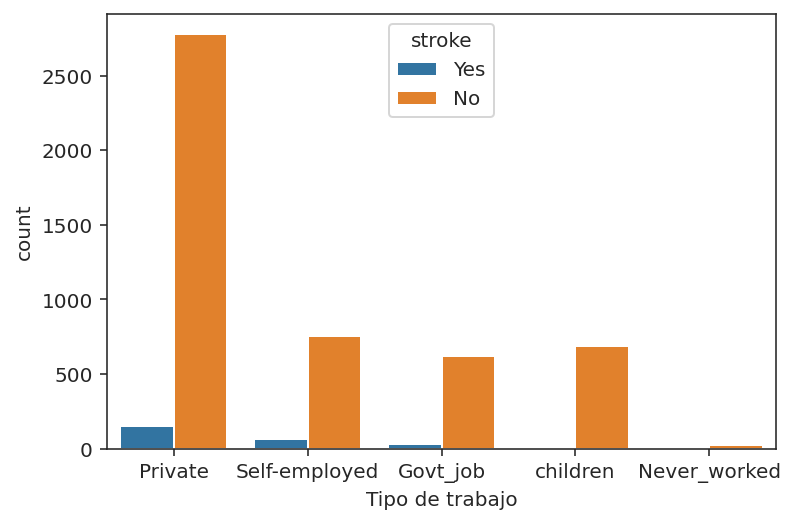

In [ ]:
ax = sns.countplot(x="work_type", hue="stroke", data=stroke)
ax.set(xlabel = 'Tipo de trabajo');

Se repiten, obviamente, las conclusiones del análisis numérico.

# <font color="steelblue">Técnicas y métodos con Scikit-Learn</font>

En los apartados que siguen en este cuaderno, mostramos los procedimientos básicos para el aprendizaje automático contenidos en la librería `Scikit-Learn`, y que en los siguientes cuadernos iremos estudiando en profundidad.

Diferenciamos en primer lugar entre los procedimientos de aprendizaje supervisado y no supervisado. Presentamos a continuación los métodos básicos para ajustar y seleccionar los parámetros del modelo a proponer sobre una base de datos. Terminamos comentando los métodos o métricas de evaluación de la calidad de los ajustes obtenidos.

La información completa sobre las técnicas de aprendizaje en Scikit-Learn se pueden consultar directamente en su [Guía de Uso](https://scikit-learn.org/stable/user_guide.html).

## <font color="steelblue">Técnicas de aprendizaje supervisado</font>

El aprendizaje [supervisado](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning), en el que tenemos una variable respuesta u objetivo (*target*), se refiere a dos problemas básicos a resolver sobre un conjunto de datos, clasificación y regresión, en los que en base a ciertas características observadas se pretende predecir una respuesta categórica (clasificación) o numérica (regresión). Veamos cuáles son los métodos más habituales en cada una de estas tipologías. Con todo, para ampliar información se recomienda consultar la [Guía de Uso de Scikit-Learn](https://scikit-learn.org/stable/supervised_learning.html).

### <font color="steelblue">Modelos de regresión</font>

Los modelos de regresión más habituales son:


- En **regresión lineal** se resuelve la estimación de los parámetros o coeficientes que relacionan de modo lineal las características disponibles con la respuesta de tipo numérico. Los resultados -coeficientes estimados- explican el grado en que cada una de las variables predictoras contribuye a explicar la respuesta, o lo que es lo mismo, el grado de asociación lineal con ella. Los modelos de regresión son más rápidos de entrenar que otros modelos de aprendizaje automático, si bien son sensibles a valores atípicos, no dan buenos resultados si la relación entre predictores y respuesta no es de tipo lineal, y las predicciones no son buenas cuando hay pocos datos y muchos predictores.

Aplicaciones populares de este tipo de modelo son la predicción del precio de la vivienda, la estatura de adulto, la esperanza de vida, ..., si bien se utiliza en infinidad de contextos.

- **Regresión logística**. Se modela una relación lineal entre los predictores o entradas y una transformación [*logit*](https://es.wikipedia.org/wiki/Logit) de la probabilidad de clasificar a un sujeto de la muestra en una de dos categorías posibles (identificadas 0/1), para predecir dicha probabilidad. Es interpretable, en la medida en que los parámetros o coeficientes estimados explican el peso que tiene cada característica sobre la probabilidad de clasificación. Se puede generalizar a modelos de clasificación con más categorías de respuesta. Como desventajas tiene las mismas que el modelo de regresión lineal: falla cuando falta linealidad con los predictores y con bancos de datos con pocas muestras y muchos predictores.

Otros modelos de regresión que mejoran ciertas deficiencias de los anteriores son la **regresión ridge** y la **regresión lasso**.

### <font color="steelblue">Modelos de clasificación</font>

Son modelos específicos de clasificación el **modelo naïve Bayes**, muy utilizado en aplicaciones reales, y el modelo de **K vecinos más cercanos**. 

- El **algoritmo de K vecinos más cercanos** o *K-Nearest Neighbors (KNN)* es un clasificador que utiliza la proximidad entre las observaciones en las variables disponibles, para hacer clasificaciones o predecir agrupaciones de datos. Se caracteriza por ser fácil de aplicar sin necesidad de crear un modelo, configurar parámetros o formular hipótesis suplementarias. Como desventajas destacamos que el algoritmo se ralentiza cuando aumentan el número de datos y/o el de variables. 

### <font color="steelblue">Modelos de clasificación y regresión</font>

Las técnicas que se pueden aplicar tanto en tareas de clasificación como de regresión son:

- Las **máquinas de vectores de soporte** o *Support Vector Machines (SVM)* construyen un hiperplano en un espacio multidimensional para separar las observaciones en distintas clases, de modo que el hiperplano maximiza el margen entre los puntos en clases distintas. Genera también dimensiones adicionales a través de núcleos o *kernels*. Ofrecen una buena precisión y realizan predicciones más rápidas que el algorimo naïve Bayes, y también utilizan menos memoria. Son muy versátiles para un buen número de problemas diversos, y en espacios dimensionales elevados (con muchas variables). No propociona buenos resultados sin embargo para grandes conjuntos de datos, tampoco con clases superpuestas, y es sensible al tipo de núcleo utilizado.

- Los **árboles de decisión**  *(Decision Trees)* están basados en aplicar secuencialmente reglas de decisión sobre las características disponibles, para seccionar categorías o segmentos y producir predicciones. Entre las ventajas encontramos que el resultado es explicable e interpretable y que se puede utilizar con valores faltantes. Como desventajas destacamos que es sensible a los valores atípicos y que es propenso al sobreajuste. 
Aplicaciones de esta técnica son la creación de perfiles de clientes, predicción de pérdidas en carteras de seguros, etc.

- Los **bosques aleatorios**  *(Random Forests)* aprovechan las ventajas de los árboles de decisión para ajustar múltiples árboles a múltiples subconjuntos de los datos, y con todos ellos mejorar la predicción combinando los resultados de todos los árboles ajustados. Tiene más precisión comparado con otros modelos como los árboles. Por otro lado, la complejidad del entrenamiento puede ser grande y no son fáciles de interpretar.

Aplicaciones de esta técnica son la elaboración de modelos de puntuación de crédito y la predicción de los precios de la vivienda.

## <font color="steelblue">Técnicas de aprendizaje no supervisado
</font>

Entre las técnicas de aprendizaje [no supervisado](https://scikit-learn.org/stable/unsupervised_learning.html) destacamos :

- **K-Medias** *(K-Means)* es el enfoque de agrupamiento más utilizado. Clasifica los datos en K grupos utilizando las distancias euclídeas. Entre las ventajas encontramos que se escala a grandes conjuntos de datos, es simple de implementar e interpretar y los resultados se muestran en grupos compactados. Entre las desventajas, requiere especificar el número de grupos o cluster a generar y el algoritmo es sensible a esta especificación.

- La **agrupación jerárquica** *(hierarchical clustering)* es un enfoque de abajo hacia arriba en el que cada punto de datos se trata como su propio grupo y los dos grupos más cercanos se fusionan de forma iterativa. No se necesita especificar a priori el número de grupos en los que dividir el conjunto de datos disponible, y el dendrograma resultante es informativo. No siempre proporciona la mejor agrupación y no es adecuado para grandes conjuntos de datos debido a su alta complejidad computacional.

- El **análisis de componentes principales** *(Principal Component Analysis -PCA)* es un método estadístico que permite simplificar problemas con muchas dimensiones (variables) manteniendo el máximo de información. Genera nuevas características que se construyen como combinaciones de las originales, de forma que esas nuevas variables explican el máximo de la variabilidad de los datos y son independientes entre sí (no comparten información).  Se ejecuta bastante rápido. Si bien las componentes se pueden explicar con las variables originales, las nuevas coordenadas ya no son variables reales y son poco interpretables. Están muy influenciadas por los valores atípicos en los datos y no ofrecen resultados satisfactorios en muchos problemas supervisados.

Otras técnicas de aprendizaje no supervisado son el **algoritmo DBSCAN**, **mainfold learning**, y los **modelos de mixturas gaussianas**, y otros más sobre los que se puede encontrar información en la [Guía de Uso de Scikit-Learn](https://scikit-learn.org/stable/unsupervised_learning.html).

Aplicaciones de estos algoritmos son la segmentación de clientes, los sistemas de recomendación, la detección de fraudes, y la agrupación de documentos basada en la similitud.

# <font color="steelblue">Selección y evaluación del modelo</font>

Puesto que ya hemos hecho un repaso breve sobre las técnicas más relevantes de aprendizaje automático y su clasificación según los objetivos y tipos de problemas, procedemos a hora a revisar por encima dos procedimientos habituales al ajustar este tipo de modelos:

- **métricas** con las que evaluar la eficiencia y calidad del modelo ajustado;
- **validación cruzada** para evitar el sobreajuste aprovechando al máximo los datos y garantizando buenos resultados de predicción.

En los siguientes cuadernos iremos profundizando en estos procesos y otros que vayan surgiendo según el modelo.


## <font color="steelblue">Métricas</font>

Si bien el preprocesado de los datos y el entrenamiento de un modelo de aprendizaje son pasos clave en el proceso de aprendizaje automático, es igualmente importante medir el rendimiento o calidad del modelo entrenado. 

El usar diferentes métricas cuando evaluamos un modelo, nos permite mejorarlo en función de criterios diversos. 

Además, dependiendo del tipo de modelo/problema de aprendizaje resuelto, disponemos de distintas métricas recomendadas. Revisamos en esta primera aproximación las métricas más comunes en problemas de clasificación y en problemas de regresión, si bien ampliaremos nuestro conocimiento más adelante conforme estudiemos en detalle las diversas técnicas. Para ampliar información sobre el tema, se recomienda consultar la [Guía de Uso de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#).


El módulo `sklearn.metrics` en `Scikit-Learn` implementa distintas métricas, algunas de las cuales se presentan a continuación.

### <font color="steelblue">Métricas de clasificación</font>

Las métricas de clasificación nos permiten medir la calidad del modelo de aprendizaje automático en tareas de clasificación contabilizando clasificación correcta e incorrecta. Las métricas más habituales ya fueron definidas en el cuaderno ['Introducción al aprendizaje automático'](https://colab.research.google.com/drive/1CDzyGs2r2fETKsDRxxYd4zxdI71tm531) y están implementadas en `Scikit-Learn` con las funciones:

- `accuracy_score()` para exactitud, 
- `precision_score()` para precisión, 
- `recall_score()` para el recuerdo,
- `f1_score()` para la puntuación f1,
- `classification_report()` proporciona directamente todas estas métricas.



Todas estas métricas se derivan de la matriz de confusión, que también se puede evaluar con este módulo a través de la función **`confusion_matrix()`**, que proporciona el número de datos que, en cada una de las categorías de respuesta son clasificados correcta a incorrectamente.  

Hay muchas más métricas de clasificación que se pueden encontrar en la [Guía de Uso de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

Para ejemplificar el uso de las funciones con las que calcular las métricas propuestas, partimos de unos datos simulados (respuestas observadas y predicciones) y el problema mas sencillo de clasificar muestras con sólo dos valores posibles (0/1).

In [ ]:
# Simulación de una muestra de clasificaciones 0/1 y de sus 
# predicciones 0/1 bajo un hipotético modelo de aprendizaje automático

n = 50
random.seed(0)
y_true = np.zeros(n)   # respuesta observados
y_pred = np.zeros(n)   # respuesta estimados
# Observaciones
for i in range(n):
    if(random.random() < 0.5):
      y_true[i] = 1
# Predicciones
for i in range(n):
    if(random.random() < 0.5):
      y_pred[i] = 1

Obtenemos la matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
# Obtenemos la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
cm

array([[20,  9],
       [14,  7]])

La representamos gráficamente, de modo que aparece en el eje vertical la clasificación 0/1 de las observaciones y en el horizontal la clasificación 0/1 de las predicciones. Los números en el centro de las celdas representan el número de datos clasificados en las distintas combinaciones de observaciones/predicciones. Así la celda [observados=0,predichos=0] contiene el número de sujetos que estando clasificados en la clase 0, han sido clasificados como 0 (20). La celda [observados=1,predichos=0] contiene el número de sujetos que estando en la clase 1 fueron clasificados como 0 (14).

[Text(33.0, 0.5, 'Observados'), Text(0.5, 15.0, 'Predichos')]

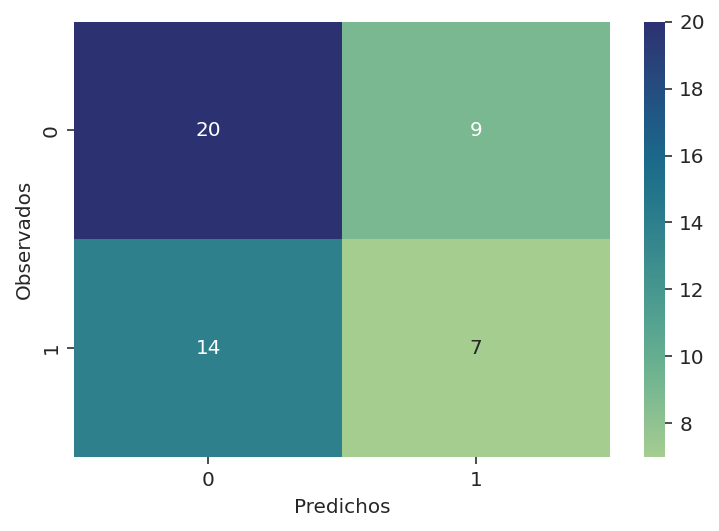

In [ ]:
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="crest")
ax.set(ylabel = "Observados", xlabel="Predichos")

#### <font color='steelblue'>Exactitud</font>

La función [`accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) nos permite obtener la exactitud vinculada a una matriz de confusión.

Los parámetros básicos de configuración de esta función son:

* **`y_true`**: valores respuesta (*target*) observados;
* **`y_pred`**: respuestas estimadas mediante un modelo de aprendizaje automático de clasificación;
* **`normalize = {True o False}`**: si es False devuelve el número de muestras clasificadas correctamente, y con True devuelve la fracción y no el número;
* **`sample_weight`**: pesos de las muestras, si se utilizan.


Aplicamos a continuación esta función a los datos simulados.

In [ ]:
# Importamos la función a utilizar
from sklearn.metrics import accuracy_score
# Proporción de muestras correctamente clasificadas
print(accuracy_score(y_true, y_pred)) 
# Número de muestras correctamente clasificadas
print(accuracy_score(y_true, y_pred, normalize=False))

0.54
27


Del total de muestras disponibles, 27 se han clasificado correctamente, lo que supone un 54% sobre el total.

#### <font color='steelblue'>Precisión</font>

La función [`precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) nos permite calcular la precisión vinculada a la tabla de confusión.

Los parámetros básicos de configuración de esta función son:

* **`y_true`**: valores target observados.
* **`y_pred`**: target estimados mediante un modelo de aprendizaje automático de clasificación.


In [ ]:
# importamos precision_score
from sklearn.metrics import precision_score
# Precisión en términos de porcentaje
format(precision_score(y_true, y_pred), '.2%') 

Se consigue pues una precisión en la clasificación del 43.75%.

#### <font color='steelblue'>Recuerdo</font>

La función [`recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) permite calcular el recuerdo de la matriz de confusión.

Los parámetros básicos de configuración de esta función son los mismos que los de `precision_score()`.

In [ ]:
# importamos recall_score
from sklearn.metrics import recall_score
# calculamos el recuerdo 
format(recall_score(y_true, y_pred), '.2%') 

El recuerdo obtenido en la clasificación es del 33.33%.

#### <font color='steelblue'>Puntuación f1</font>

La función [`f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) nos permite obtener la *puntuación F1*, también conocida como 'puntuación F equilibrada' o 'medida F', vinculada a la matriz de confusión.


In [ ]:
# importamos f1_score
from sklearn.metrics import f1_score
# cálculo de la puntuación f1
format(f1_score(y_true, y_pred), '.2%') 

'37.84%'

La puntuación f1 para la clasificación obtenida es del 37.84%.

Para terminar, podemos calcular y reportar directamente todas las las medidas anteriores mediante la función `classification_report()`, función que aporta además diferentes modificaciones que estudiaremos más adelante.

In [ ]:
# importamos la función
from sklearn.metrics import classification_report
# calculamos todas las métricas
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

         0.0       0.59      0.69      0.63        29
         1.0       0.44      0.33      0.38        21

    accuracy                           0.54        50
   macro avg       0.51      0.51      0.51        50
weighted avg       0.52      0.54      0.53        50



### <font color="steelblue">Métricas de regresión</font>

En las tareas de regresión el objetivo es predecir el valor numérico de la respuesta o variable objetivo (*target*) del problema. La calidad de un ajuste es pues razonable evaluarla a través de las desviaciones o distancias entre los valores observados y los valores predichos. Presentamos las funciones que nos proporcionan distintas versiones de error para este tipo de modelos:

- `mean_squared_error()` para el error cuadrático medio (MSE) y su raíz (RMSE) 
- `mean_absolute_error()` error absoluto medio (MAE). 

Otras métricas para la evaluación de los modelos de regresión se pueden consultar en la [Guía de Uso Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) y serán estudiadas más adelante.

Para ejemplificar el uso de estas funciones utilizamos una muestra simulada de cierta variable numérica, así como de sus predicciones. 

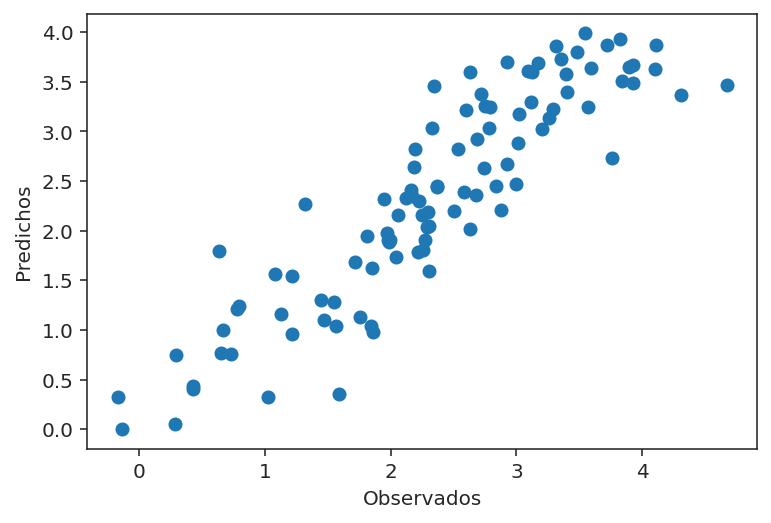

In [ ]:
# Simulación de una muestra de observaciones y predicciones
# de una variable numérica en un problema de regresión
random.seed(0)
# Generamos datos originales y predichos mediante un modelo y = 4*x + bias
x = [random.random() for i in range(100)]
beta = np.array(4.0)
# Bias de cada modelo
bias = [random.gauss(0,0.5) for i in range(100)]
# valor predicho 
y_pred = beta*x
# valores originales de cada modelo
y_true = y_pred + bias
# Grafico 
fig, ax = plt.subplots()
ax.scatter(y_true,y_pred)
plt.xlabel("Observados")
plt.ylabel("Predichos")
plt.show()

#### <font color='steelblue'>Error cuadrático medio</font>

La función [`mean_squared_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) nos permite obtener el error cuadrático medio asociado con un problema de regresión. 

Los parámetros de esta función son los siguientes:

* **`y_true`**: valores respuesta observados,
* **`y_pred`**: valores respuesta predichos por un modelo de regresión,
* **`sample_weight`**: pesos de las muestras, si los hay,
* **`multioutput = {‘raw_values’, ‘uniform_average’}`**: define la agregación de múltiples valores de salida. 
 * **raw_values** : devuelve un conjunto completo de errores en caso de entrada de múltiples salidas.
 * **‘uniform_average’** : los errores de todas las salidas se promedian con un peso uniforme.
* **`squared = {True o False}`**: si es `True` devuelve el MSE y si es `Falso` devuelve el RMSE (raíz del error cuadrático medio).

In [ ]:
# importamos mean_squared_error
from sklearn.metrics import mean_squared_error
# Cálculo del MSE
print('MSE: %.2f' % mean_squared_error(y_true, y_pred))
# Cálculo del RMSE
print('RMSE: %.2f' % mean_squared_error(y_true, y_pred, squared=False))


MSE: 0.22
RMSE: 0.47


#### <font color='steelblue'>Error absoluto medio</font>

La función [`mean_absolute_error()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error)  nos permite obtener el error absoluto medio asociado a un modelo de regresión.

Los parámetros de esta función son prácticamente los mismos que los de `mean_squared_error()`. La diferencia que encontramos es que en este caso el parámetro `squared` no existe.

In [ ]:
# importamos mean_absolute_error
from sklearn.metrics import mean_absolute_error
print('MAE: %.2f' % mean_absolute_error(y_true, y_pred))

MAE: 0.38


## <font color="steelblue">Validación cruzada</font>

Si ajustamos un modelo de aprendizaje automático con unos datos y chequeamos cómo funciona con esos mismos datos, es posible que consigamos resultados óptimos y aun así no consigamos unas buenas predicciones sobre otros datos que el algoritmo no ha visto antes. Cuando tal situación se produce, hablamos de **sobreajuste** y para evitarlo o reducirlo, una práctica habitual en aprendizaje automático (supervisado) es entrenar el modelo con una parte de los datos (muestra de entrenamiento) y mantener otra parte disponible para testar/evaluar el ajuste (muestra test). Si este testado se usa así mismo para reajustar los hiperparámetros del modelo, seguiremos manteniendo el problema del sobreajuste. Es por ello por lo que se opta por seccionar los datos en otro subconjunto más, llamada muestra de validación, de modo que el ajuste se entrena con la muestra de entrenamiento, se evalúa y reajusta con la muestra de validación y la evaluación final se realiza sobre la muestra test.

Se genera entonces otro problema más, de seccionar los datos en tres conjuntos, de modo que se reduce el número de muestras (datos) con los que el modelo aprende, y se puede hacer sensible a la elección aleatoria de los conjuntos de entreno y validación.

Una solución a este problema es un procedimiento denominado **validación cruzada** *(cross-validation o CV)*, que permite trabajar exclusivamente con la muestra de entrenamiento para entrenar y validar, y la muestra test para evaluar el ajuste.


La aproximación básica de la validación cruzada, llamada **k-fold CV**, consiste en que el conjunto de datos de entrenamiento es dividido en *k* subconjuntos (*folds*), y a continuación, para cada uno ellos se repite lo siguiente con un bucle:

- se entrena un modelo usando los *k-1* subconjuntos restantes como datos de entrenamiento;
- el modelo resultante se valida con el subconjunto retenido inicialmente, para calcular una medida de rendimiento del modelo.

La medida de rendimiento que se reporta como resultado del procedimiento de validación cruzada es el promedio de los valores de rendimiento calculados en el proceso (bucle). Esta aproximación puede ser computacionalmente costosa, pero no gasta tantos datos como el hecho de separar la muestra en otro subconjunto de validación, por lo que se recomienda cuando el número de muestras en el banco de datos no es muy grande.

El procedimiento de *k-fold CV* se ilustra en la siguiente figura.
<center><small><img src=https://raw.githubusercontent.com/ia4legos/MachineLearning/main/images/grid_search_cross_validation.png></small></center>

En Scikit-Learn, y en concreto en el módulo `sklearn.model_selection` disponemos de varias funciones útiles para la validación cruzada, algunas de las cuales presentamos a continuación. Para ampliar información se recomienda consultar la [Guía de Uso de Scikit-Learn](https://scikit-learn.org/stable/modules/cross_validation.html).

- `train_test_split()`, es una función que permite dividir los predictores y la respuesta para un problema de aprendizaje supervisado, en muestras de entrenamiento y de test. Basta indicar la proporción que representa la muestra test sobre el total de datos. Habitualmente el input se denota *X* e *y*, y el resultado de esta función genera *X_train*, *X_test*, *y_train*, *y_test*.       

- [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) realiza la validación cruzada con *n* subconjuntos de datos (*folds*) y proporciona la medida de eficiencia solicitada en los subconjuntos considerados (se puede calcular pues su media y su desviación típica, por ejemplo).

- [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate) se diferencia de la anterior en que permite especificar múltiples métricas de eficiencia en una lista (o tupla o set). Genera un diccionario que permite recuperar los valores de las medidas de eficiencia en las distintas iteraciones del bucle de validación, y con ellas las puntuaciones globales del proceso.

- [`cross_val_predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict) devuelve para registro en el banco de datos de entrada, la predicción de la respuesta que proporciona el modelo cuando dicho dato estaba en la muestra test. Se caracteriza por tener una interfaz similar a `cross_val_score` y solo se puede usar en estrategias de validación cruzada que asignan todos los datos a una muestra test exactamente una vez (para poder obtener una predicción única del dato cuando este estaba en la muestra test).


- Además de las funciones anteriores, cabe destacar la función [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=grid#sklearn.model_selection.GridSearchCV), que permite optimizar los hiperparámetros de un modelo a través de la validación cruzada y a partir de un grid de valores proporcionados. 